# Exercise W7D1: Review and Putting it All Together

This exercise aims to draw together the topics we have covered in the _Base Camp_ portion of the Digital Methods class. At the end of the exercise, you should have a `DataFrame` with each row containing information on a Twitter account including their tweets, friends, followers, hashtags and mentions as well as some descriptive statistics.

You will be able to reuse and modify this code for the second half of digital methods to download and analyze tweets for your projects. So, this exercise should provide you with a solid review of different things we have learned and help you for the the rest of the course.

**Exercise 1. Identify a topic, authenticate, and get data.** First, identify a topic of interest to you and think about a keyword or hashtag capturing the topic. Possible topics could be Corona or Climate, but you are welcome to choose something else. Then load the `tweepy` module and use the built-in functionality to `search` Twitter for your keyword or hashtag. Create a variable that contains the data returned by your search.

See [here](http://docs.tweepy.org/en/latest/api.html#help-methods) for more information about the `search` method.

In [5]:
import tweepy
from AppCred import CONSUMER_KEY, CONSUMER_SECRET
from AppCred import ACCESS_TOKEN, ACCESS_TOKEN_SECRET
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [6]:
freehk = api.search('#FreeHK')

Now we have an object containing a number of tweets pertaining to our topic of interest. As you might remember, by default the Twitter API returns the data to us in JSON format. Now that we know about the elegance and beauty of `DataFrames`, we would prefer to work with that format of data rather than a dictionary-style JSON. 

**Exercise 2. Turn raw API data into a DataFrame.** Your search returned a set of tweets about your chosen topic. Construct a `DataFrame` from your Twitter search object of the people who are tweeting about that topic that, at minimum, contains the unique `screen_names`, `followers_count`, `friends_count`, and `statuses_count` returned from your search. 

There are a number of ways to do this so you might want to review how to construct `DataFrames` (W6D1-Demo). You may also want to review navigating JSON objects (W4D2-Exercise_solutions). Also, your returned data might include the same account multiple times, so you will want to make sure that you are listing the account only once in your `DataFrame`.

In [23]:
#import pandas as pd
#df_freehk = pd.DataFrame(freehk['screen_names']['followers_count']['friends_count'][])
import json
import pandas as pd

# I begin by looping through all users in the json object. Because all the info is stored under each user-tree in the
# json object, i key into each individual user and loop through them all to add the info we want into separate lists.
tweetid=[]
name=[]
#text=[]
followers_count=[]
friends_count=[]
statuses_count=[]
created_at=[]

for tweet in freehk:
    if (tweet._json['user']['screen_name'] not in name): #we need to add this to avoid duplicates. It is user and then screen_names, because each screen_name is stored under each user-dict in the json file
        tweetid.append(tweet._json['user']['id']) #again we need to key into each user (think of a treeeeee)
        name.append(tweet._json['user']['screen_name'])
        #text.append(tweet._json['text']) If I want the text for each tweet I can uncomment this and add it to the df
        followers_count.append(tweet._json['user']['followers_count'])
        friends_count.append(tweet._json['user']['friends_count'])
        statuses_count.append(tweet._json['user']['statuses_count'])
        created_at.append(tweet._json['user']['created_at'])

# Now we have lists containing the information we want. Now I create a dictionary with labels, and the above lists as values
freehk_dict = {'id':tweetid,
              'name':name,
              'followers':followers_count,
              'friends':friends_count,
              'statuses':statuses_count,
              'created':created_at}

# From this dictionary i can easily make a dataframe
freehk_df = pd.DataFrame(freehk_dict)
freehk_df

,id,name,followers,friends,statuses,created
0,55166691,tax_free,5093,923,368786,Thu Jul 09 06:49:20 +0000 2009
1,1150541563283423232,dgXgtzfCSY9yAQi,40,1025,4516,Sun Jul 14 23:04:19 +0000 2019
2,1233013798505734150,kate59768541,0,66,33,Thu Feb 27 12:59:47 +0000 2020
3,1201840210884972544,lihkg88,10,74,364,Tue Dec 03 12:27:00 +0000 2019
4,953194531574439936,monfort_xavi,2105,1481,73624,Tue Jan 16 09:17:40 +0000 2018
5,2195757980,Sam011149,4,33,92,Fri Nov 15 10:38:06 +0000 2013
6,144407199,EwanSo,63,194,231,Sun May 16 05:58:54 +0000 2010
7,1070117987301023744,HKRiotPolice,267,848,3167,Wed Dec 05 00:49:44 +0000 2018
8,1195778070319251456,briggtful,739,2099,22119,Sat Nov 16 18:58:29 +0000 2019


With our neat `DataFrame` we can now easily find out details about the data we collected from Twitter.

**Exercise 3. Get information about our data.** Use the `print` function and string operations to make Python tell you in plain language: a) How many unique accounts there are in your data, b) what the name of the _last_ account in your data is, and c) what the sum of followers is for all accounts in your data. That is make Python print out full sentences with the relevant information.

In [24]:
# How many accounts?
print("There are " + str(freehk_df.name.count()) + " unique accounts in the data." ) #if i dont add str, it gives an error

# Name of last account in data?
print ("The name of the last account in the data is: " + str(freehk_df.name[8])) #Because we know there are 9 accounts, we know the last one is at index 8

# Sum of followers for all accounts
followers_all = sum(freehk_df.followers)

print ("Combined, the accounts in the data have " + str(followers_all) + " followers in total.")

There are 9 unique accounts in the data.
The name of the last account in the data is: briggtful
Combined, the accounts in the data have 8321 followers in total.


**Exercise 4. Adding data to our DataFrame.** Loop through the indices of your `DataFrame`, collect the timeline for each account using the `user_timeline` method from tweepy, and store them in a new list "timelines". Note that you will want to build in some `sleep` time to avoid running into rate limits. You can find the syntax for how to do this on page 155 and the logic and examples on pages 209-12 in Brooker (2020).

In [25]:
from time import sleep
minutes = 15

timelines=[]

# HERE IS WHAT I DID: I am not sure if its different from theirs or not, but im going with theirs for now.
# for user in freehk_df.name:
#     new_tweet = api.user_timeline(user,count=100)
#     for tweet in new_tweet:
#         timelines.append(tweet)
#     #sleep(minutes*60)

# THIS IS THEIR SOLUTION
import time
for i in freehk_df.index:
    statuses = api.user_timeline(freehk_df.name[i]) #so we only get the timelines for the users that appear in name (the i's) 
    timelines.append(statuses) #appends the statuses of the users into timelines list
    time.sleep(5)
    print(i) #this prints a number for the index it just looped through, so i can follow how long in the process i am.

0
1
2
3
4
5
6
7
8


In [26]:
timelines

[[Status(_api=<tweepy.api.API object at 0x000001F111D3DC48>, _json={'created_at': 'Tue Mar 17 11:26:03 +0000 2020', 'id': 1239875640444190722, 'id_str': '1239875640444190722', 'text': 'RT @TomWitherow: RETAIL and HOSPITALITY &gt; If you know of any shops, pubs, restaurants, bars and cafes which are closing their doors today o…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TomWitherow', 'name': 'Tom Witherow', 'id': 190213303, 'id_str': '190213303', 'indices': [3, 15]}], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 55166691, 'id_str': '55166691', 'name': 'tax_free', 'screen_name': 'tax_free', 'location': 'Hong Kong, not China', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'prote

Add your list "timelines" to your current `DataFame`. To do this, we first need to turn our list into a new `DateFrame` with one column labeled `timelines` and then join our two `DateFrames` horizontally, i.e. along `axis = 1`.

In [27]:
timelines_df = pd.DataFrame({"timelines":timelines}) # Makes a dataframe of the timelines (doesn't make any sense initially)
freehk_df = pd.concat([freehk_df, timelines_df], axis=1) #Concatenates the old df with the timeline df horizontally (again, doens't make sense when it is printed, what this is supposed to do)

freehk_df

,id,name,followers,friends,statuses,created,timelines
0,55166691,tax_free,5093,923,368786,Thu Jul 09 06:49:20 +0000 2009,[Status(_api=<tweepy.api.API object at 0x00000...
1,1150541563283423232,dgXgtzfCSY9yAQi,40,1025,4516,Sun Jul 14 23:04:19 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...
2,1233013798505734150,kate59768541,0,66,33,Thu Feb 27 12:59:47 +0000 2020,[Status(_api=<tweepy.api.API object at 0x00000...
3,1201840210884972544,lihkg88,10,74,364,Tue Dec 03 12:27:00 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...
4,953194531574439936,monfort_xavi,2105,1481,73624,Tue Jan 16 09:17:40 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...
5,2195757980,Sam011149,4,33,92,Fri Nov 15 10:38:06 +0000 2013,[Status(_api=<tweepy.api.API object at 0x00000...
6,144407199,EwanSo,63,194,231,Sun May 16 05:58:54 +0000 2010,[Status(_api=<tweepy.api.API object at 0x00000...
7,1070117987301023744,HKRiotPolice,267,848,3167,Wed Dec 05 00:49:44 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...
8,1195778070319251456,briggtful,739,2099,22119,Sat Nov 16 18:58:29 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...


### Take a deep breath. This was a major piece of coding. 

Now you have the timeline, that is the statuses, for each of your accounts in the `DataFrame`. But these are still in the raw format which the Twitter API returns, so we need to transform them into a format that allows us to to work with them more easily. In the end, we want to get at the the topics and persons our accounts tweet about.

**Exercise 5. Getting the tweet texts from the timeline.** Extract the text from the tweets in each account's timeline, combine them into a list, turn the list of lists into a `DataFrame`, and join the new and old `DataFrames`. One way to do this is to 1) create an empty list 'tweets', 2) loop through the indices in your `DataFrame`, 3) for each index/row loop through the timeline, 4) create a temporary list, append the text for each timeline element to that list, then append the temporary list to 'tweets' 5) turn the list into a `DataFrame` and 6) merge the two `DataFrames` horizontally.

In [28]:
#Extract the tweets from each account's timeline
tweets=[]
for i in freehk_df.index: #Uses index, because each row is an account = loops through each account
    tweetsnumber=len(freehk_df.timelines[i]) #Counts the number of tweets
    temptext=[] #Temporary list
    
    for tweet in range(0,tweetsnumber): # For all the tweets in the range of tweetsnumber (i.e. for all tweets in timelines)
        temptext.append(freehk_df.timelines[i][tweet]._json['text']) #for each tweet this appends the text of it in temptext
    tweets.append(temptext) #Combines tweets from each account into a list

#Turn list of lists into dataframe
tweets = pd.DataFrame({"tweets":tweets}) #Gives one column with tweets in each row (I have 11, like I had 11 users/index)
tweets

# Concatenate df's
freehk_df= pd.concat([freehk_df, tweets], axis = 1) #Concatenates tweets into freehk_df horizontally
freehk_df

,id,name,followers,friends,statuses,created,timelines,tweets
0,55166691,tax_free,5093,923,368786,Thu Jul 09 06:49:20 +0000 2009,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @TomWitherow: RETAIL and HOSPITALITY &gt; ...
1,1150541563283423232,dgXgtzfCSY9yAQi,40,1025,4516,Sun Jul 14 23:04:19 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @Hkers51: #轉自telegram *每日警暴實錄\n\n⚠️ #16號事件...
2,1233013798505734150,kate59768541,0,66,33,Thu Feb 27 12:59:47 +0000 2020,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @RFA_Chinese: 【港府向全球发红色外游警示】\n【但中国内地、澳门及台湾...
3,1201840210884972544,lihkg88,10,74,364,Tue Dec 03 12:27:00 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @EricccWong68: 推文 / Twitter https://t.co/S...
4,953194531574439936,monfort_xavi,2105,1481,73624,Tue Jan 16 09:17:40 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @blauigrana12: Me llamo Rocki voy hacer 4 ...
5,2195757980,Sam011149,4,33,92,Fri Nov 15 10:38:06 +0000 2013,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @IntyMedia: @realDonaldTrump China kill or...
6,144407199,EwanSo,63,194,231,Sun May 16 05:58:54 +0000 2010,[Status(_api=<tweepy.api.API object at 0x00000...,[Yes. We Hong Kong people know the truth very ...
7,1070117987301023744,HKRiotPolice,267,848,3167,Wed Dec 05 00:49:44 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...,"[RT @suzutaro18: 😂😂 https://t.co/jQ0pVM2ur5, R..."
8,1195778070319251456,briggtful,739,2099,22119,Sat Nov 16 18:58:29 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @DCheng36387164: 信報【港25年來首失全球最自由經濟體地位】http...


**Exercise 6. Turning our list of tweet texts into a long string.** To get a sense of what our accounts usually tweet about, it might be useful to have their tweets in one long string that allows us to easily count the words they use. Create a list that holds the long string of tweets for each user. We can concatenate our list of tweets/strings using the [join](https://docs.python.org/2/library/string.html#string.join) command for which you can find a usage example [here](https://stackoverflow.com/a/493842).

Turn the list into a `DataFrame` and merge it with your main `DataFrame` horizontally. 

In [29]:
alltweets=[]

for i in freehk_df.index: #For all users in df
    alltweets.append(" ".join(freehk_df['tweets'][i])) 
    #Joins all tweets from individual user into one string for that user and appends it into the list
    # Imagine that the i is the username of a person. So like ['tweets']['emilbakke']

# Turn list of combined tweets into a df
text = pd.DataFrame({"text":alltweets})

# Concatenate into freehk_df
freehk_df = pd.concat([freehk_df, text], axis=1)
freehk_df

,id,name,followers,friends,statuses,created,timelines,tweets,text
0,55166691,tax_free,5093,923,368786,Thu Jul 09 06:49:20 +0000 2009,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @TomWitherow: RETAIL and HOSPITALITY &gt; ...,RT @TomWitherow: RETAIL and HOSPITALITY &gt; I...
1,1150541563283423232,dgXgtzfCSY9yAQi,40,1025,4516,Sun Jul 14 23:04:19 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @Hkers51: #轉自telegram *每日警暴實錄\n\n⚠️ #16號事件...,RT @Hkers51: #轉自telegram *每日警暴實錄\n\n⚠️ #16號事件薄...
2,1233013798505734150,kate59768541,0,66,33,Thu Feb 27 12:59:47 +0000 2020,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @RFA_Chinese: 【港府向全球发红色外游警示】\n【但中国内地、澳门及台湾...,RT @RFA_Chinese: 【港府向全球发红色外游警示】\n【但中国内地、澳门及台湾除...
3,1201840210884972544,lihkg88,10,74,364,Tue Dec 03 12:27:00 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @EricccWong68: 推文 / Twitter https://t.co/S...,RT @EricccWong68: 推文 / Twitter https://t.co/Sf...
4,953194531574439936,monfort_xavi,2105,1481,73624,Tue Jan 16 09:17:40 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @blauigrana12: Me llamo Rocki voy hacer 4 ...,RT @blauigrana12: Me llamo Rocki voy hacer 4 a...
5,2195757980,Sam011149,4,33,92,Fri Nov 15 10:38:06 +0000 2013,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @IntyMedia: @realDonaldTrump China kill or...,RT @IntyMedia: @realDonaldTrump China kill or ...
6,144407199,EwanSo,63,194,231,Sun May 16 05:58:54 +0000 2010,[Status(_api=<tweepy.api.API object at 0x00000...,[Yes. We Hong Kong people know the truth very ...,Yes. We Hong Kong people know the truth very c...
7,1070117987301023744,HKRiotPolice,267,848,3167,Wed Dec 05 00:49:44 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...,"[RT @suzutaro18: 😂😂 https://t.co/jQ0pVM2ur5, R...",RT @suzutaro18: 😂😂 https://t.co/jQ0pVM2ur5 RT ...
8,1195778070319251456,briggtful,739,2099,22119,Sat Nov 16 18:58:29 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @DCheng36387164: 信報【港25年來首失全球最自由經濟體地位】http...,RT @DCheng36387164: 信報【港25年來首失全球最自由經濟體地位】https...


**Exercise 7. Finding hashtags and mentions.** Now that we have all the tweets for each account in one long string, we can start looking at the topics the accounts are tweeting about and who they are interacting with. To do so, you can use the [`findall`](https://docs.python.org/3/library/re.html#re.findall) function from the `re` package to extract all hashtags (starting with a "#") and mentions (starting with an "@"). Add one column for hashtags and mentions respectively to your `DataFrame`.

In [30]:
# Finding all mentions in the data (mentions are @ at someone).
import re
mentions=[]
hashtags=[]
for i in freehk_df.index: #Again uses index to loop through each user
    mentions.append(re.findall('@\S+', freehk_df['text'][i]))
    hashtags.append(re.findall('#\S+', freehk_df['text'][i]))
#\S+ says multiple characters that are not whitespace (i.e. no space after mention: @). So it finds all that says: @XXXXX but not @ X X

#Turns lists into dataframes
mentions = pd.DataFrame({"mentions":mentions}) #I import them as dictionaries (label/keys pairs) or I won't get column names
hashtags = pd.DataFrame({"hashtags":hashtags})

#Concatenates into existing dataframe
freehk_df = pd.concat([freehk_df, hashtags, mentions], axis = 1)
freehk_df

,id,name,followers,friends,statuses,created,timelines,tweets,text,hashtags,mentions
0,55166691,tax_free,5093,923,368786,Thu Jul 09 06:49:20 +0000 2009,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @TomWitherow: RETAIL and HOSPITALITY &gt; ...,RT @TomWitherow: RETAIL and HOSPITALITY &gt; I...,"[#corvid19uk, #hos…, #wuhanvirus, #鍾南山]","[@TomWitherow:, @adscomms:, @HafodFamily, @ETh..."
1,1150541563283423232,dgXgtzfCSY9yAQi,40,1025,4516,Sun Jul 14 23:04:19 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @Hkers51: #轉自telegram *每日警暴實錄\n\n⚠️ #16號事件...,RT @Hkers51: #轉自telegram *每日警暴實錄\n\n⚠️ #16號事件薄...,"[#轉自telegram, #16號事件薄, #香港警暴, #HKPoliceTerrori...","[@Hkers51:, @MarcoCh01888073:, @BABAYAGa2_0:, ..."
2,1233013798505734150,kate59768541,0,66,33,Thu Feb 27 12:59:47 +0000 2020,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @RFA_Chinese: 【港府向全球发红色外游警示】\n【但中国内地、澳门及台湾...,RT @RFA_Chinese: 【港府向全球发红色外游警示】\n【但中国内地、澳门及台湾除...,"[#hongkong., #hongkongpoli…, #HongKongProtesto...","[@RFA_Chinese:, @RFA_Chinese:, @taocomic:, @re..."
3,1201840210884972544,lihkg88,10,74,364,Tue Dec 03 12:27:00 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @EricccWong68: 推文 / Twitter https://t.co/S...,RT @EricccWong68: 推文 / Twitter https://t.co/Sf...,"[#Hongkongers,, #CCP,, #CCP, #WuhanCoronavirus...","[@EricccWong68:, @achongkong:, @realKyleOlbert..."
4,953194531574439936,monfort_xavi,2105,1481,73624,Tue Jan 16 09:17:40 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @blauigrana12: Me llamo Rocki voy hacer 4 ...,RT @blauigrana12: Me llamo Rocki voy hacer 4 a...,"[#coro…, #haiku]","[@blauigrana12:, @Tu_Bombonzito, @JuntsXCat:, ..."
5,2195757980,Sam011149,4,33,92,Fri Nov 15 10:38:06 +0000 2013,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @IntyMedia: @realDonaldTrump China kill or...,RT @IntyMedia: @realDonaldTrump China kill or ...,"[#coronavirus, #Wuhan, #WuhanVirus, #FreeHK, #...","[@IntyMedia:, @realDonaldTrump, @IntyMedia:, @..."
6,144407199,EwanSo,63,194,231,Sun May 16 05:58:54 +0000 2010,[Status(_api=<tweepy.api.API object at 0x00000...,[Yes. We Hong Kong people know the truth very ...,Yes. We Hong Kong people know the truth very c...,"[#AntiChinazi, #FreeHK, #HongKong, #StandWithH...",[@SenateForeign:]
7,1070117987301023744,HKRiotPolice,267,848,3167,Wed Dec 05 00:49:44 +0000 2018,[Status(_api=<tweepy.api.API object at 0x00000...,"[RT @suzutaro18: 😂😂 https://t.co/jQ0pVM2ur5, R...",RT @suzutaro18: 😂😂 https://t.co/jQ0pVM2ur5 RT ...,"[#Chinese, #WuhanVirus., #殺人政權, #hk, #Hongkong...","[@suzutaro18:, @Hope54049027:, @eugenegu, @rea..."
8,1195778070319251456,briggtful,739,2099,22119,Sat Nov 16 18:58:29 +0000 2019,[Status(_api=<tweepy.api.API object at 0x00000...,[RT @DCheng36387164: 信報【港25年來首失全球最自由經濟體地位】http...,RT @DCheng36387164: 信報【港25年來首失全球最自由經濟體地位】https...,"[#美國傳統基金會, #轉自instagram, #罷藍店, #罷藍資生堂, #藍屍劉亦菲,...","[@DCheng36387164:, @LTBLNews:, @hkbhkese:, @Hk..."


**Exercise 8. Writing your insights to a file.** You have just generated some really awesome insights about the accounts you identified earlier. To share your insights, that is the topics/hashtags your accounts tweet about, you should now write the hashtags to a text file–if you want to remind yourself, we covered this in week 3 day 1. Can you make it so the text file first lists the name and then the hashtags the account uses?

In [36]:
#Open a file in write mode
f = open('Hashtags used in #FreeHK.txt', 'w', encoding="utf-8")

#Loop through each user using index, adds their username and list of hashtags to file. Uses \n to add line breaks
for i in freehk_df.index: #Again, imagine i is a user
    f.write(str(freehk_df['name'][i]) + ": " + str(freehk_df['hashtags'][i])+"\n") #Remember to add str, or it won't work
f.close()

**Exercise 9. Descriptive statistics about your accounts.** We closed last week with talking about descriptive statistics. For the accounts you gathered, there are at least three variables that you might be interested to know more about. What are the minimum, maximum, and mean for the number of followers, friends, and posted statuses in you data?

In [41]:
freehk_df.followers.describe()

count       9.000000
mean      924.555556
std      1706.588052
min         0.000000
25%        10.000000
50%        63.000000
75%       739.000000
max      5093.000000
Name: followers, dtype: float64

**Exercise 10. Visualizing influence.** To round off this exercise, let's plot some data from the accounts you collected. Make a bar plot to show which of the accounts has the most influence on Twitter. _Hint:_ You might want to look at `followers_count`.

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

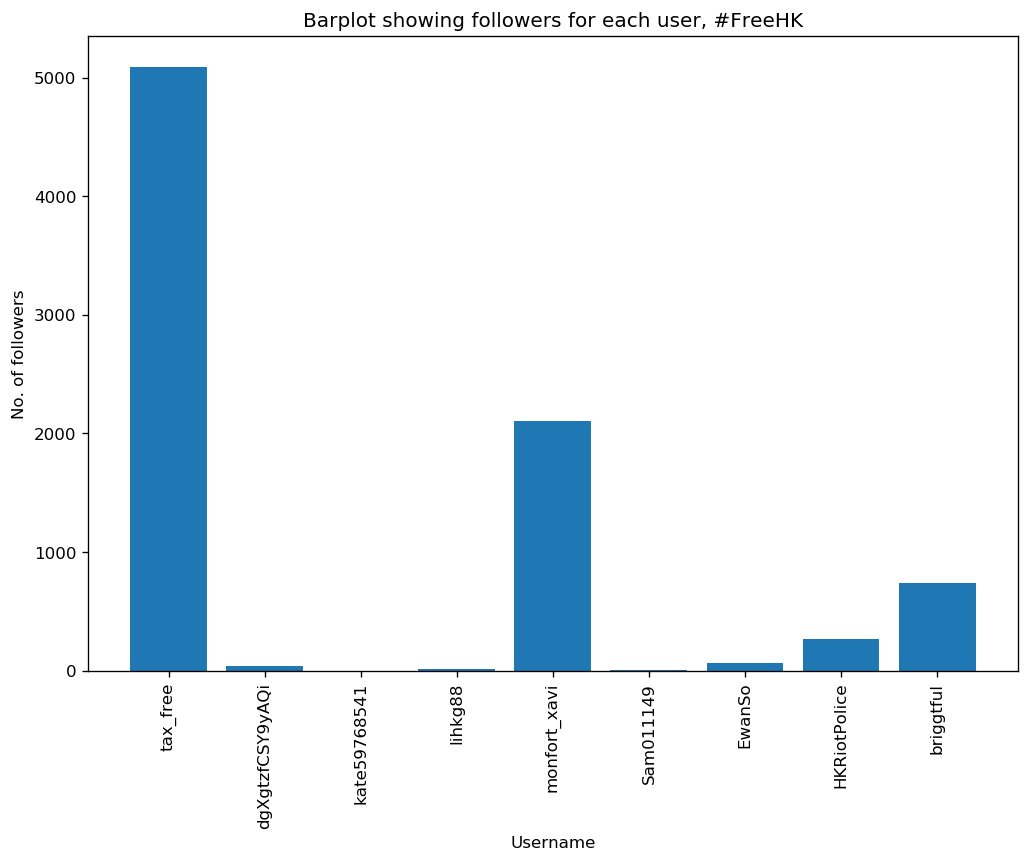

In [52]:
#followers=[]
#user=[i for i in freehk_df['name'][i]]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7), dpi= 120)
plt.bar(freehk_df['name'], freehk_df['followers'])

plt.title("Barplot showing followers for each user, #FreeHK")
plt.xlabel("Username")
plt.ylabel("No. of followers")
plt.xticks(rotation=90)

**Exercise 11. Understanding influence.** Now that you know who is most influential among your accounts, try to see if the data you get from Twitter allows you to explore what might explain that influence. Look into your data and plot the follower count against another variable. Is there a pattern?

Text(0, 0.5, 'No. of status updates')

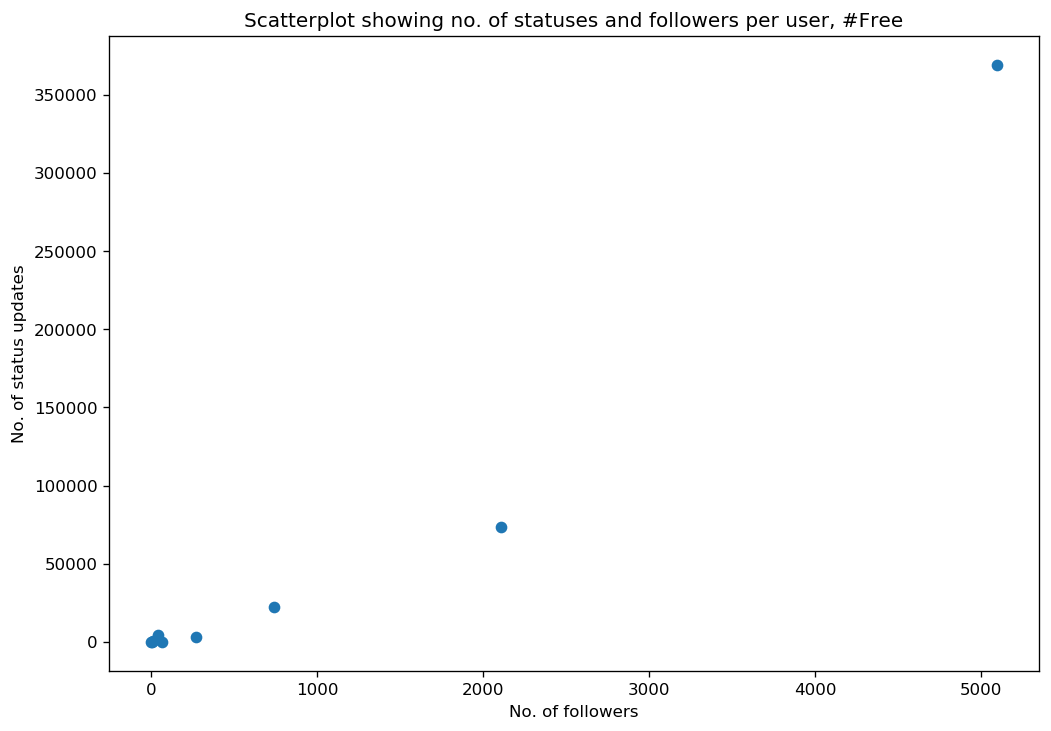

In [55]:
plt.figure(figsize=(10, 7), dpi= 120)
plt.plot(freehk_df['followers'], freehk_df['statuses'], 'o')

plt.title("Scatterplot showing no. of statuses and followers per user, #Free")
plt.xlabel("No. of followers")
plt.ylabel("No. of status updates")

# This shows pretty much a linear trend between number of status updates and followers - maybe slightly exponential?. 
# Suggests that more active users get more influence on Twitter than more inactive accounts.

In [73]:
# Trying out linear regression on followers vs. status
import numpy as np
from sklearn.linear_model import LinearRegression

foll = np.array(freehk_df['followers']).reshape(-1, 1)
stat = np.array(freehk_df['statuses']).reshape(-1, 1)

model = LinearRegression()
model.fit(foll,stat)

r_sq = model.score(foll,stat)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# If i interpret this correctly, there is a very strong connection. Based on this (very small) dataset, when a amount of
# status updates rise by 1 (y), followers (x) are to increase by 69. 

coefficient of determination: 0.9540698071876025
intercept: [-11471.56535131]
slope: [[69.24361112]]


**THERE IS ALWAYS MORE.** If you got all the way through this exercise and are still hungry for more, here are some suggestions for other things you could do:

1. To get an even better sense of what your accounts tweet about than just using hashtags, you could count the most used words. Create a list that, for each account has a dictionary of the frequency of each word with stop words removed. Remember, you can reuse your code from W3D1. You can get a list of stop words from [here](http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words). These are also stored in `stop_words.txt`. Add a column to your dataframe for most used words. 
2. Extract the number of favorites and retweets from the timelines you gathered. Is there any relationship between the number of followers and these figures? How about between these figures and the number of friends?
3. Researchers often use Twitter because we can do respondent-driven sampling, i.e. we start with a few accounts and then collect the accounts that follow these accounts to get a broader picture of the network. Start exploring the networks of the accounts you collected using the [`followers`](https://tweepy.readthedocs.io/en/latest/api.html#API.followers) command.
4. Given that the accounts you collected are similar in that they tweet about your topic of choice, it might be interesting know if there are issues that distinguish the accounts. Researchers often use term frequency-inverse document frequency to study such differences. [Here](https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/) is a primer on the concept and a tutorial on how to implement it in Python. Can you find distinguishes your accounts from one another?